In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns
import random

### Return Distribution for a single stock (AAPL)

Data: Query ID 9692246

Some questions: 
* What stock did we want to use? This figure isn't exactly the same as the one in the slides, but I think it conveys the same message. Happy to change the stock we are using regardless.
* Is the "+1" to returns necessary? 

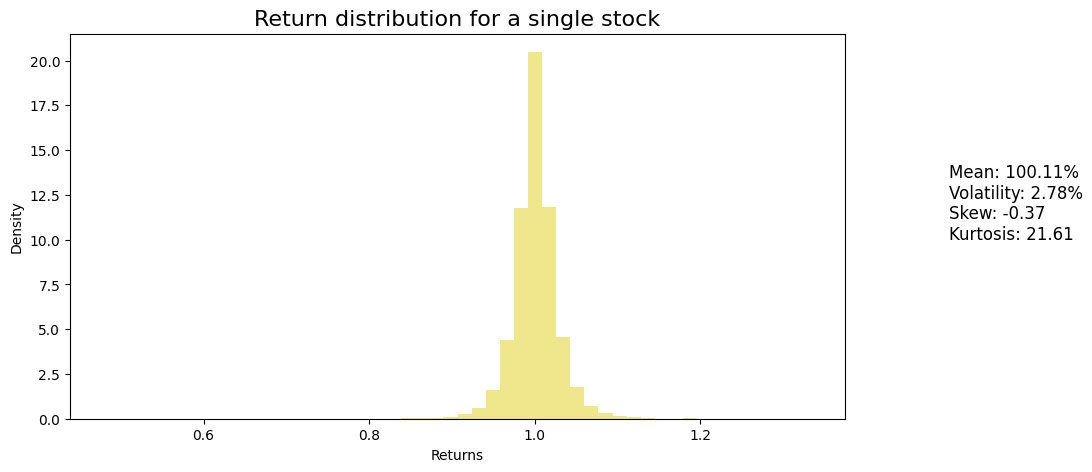

In [ ]:
# return distribution for a single stock (6) ; this is for apple. 
df = pd.read_csv("./WRDS_aaple_returns.csv")
#print(df.head())

# convert returns to a numeric column
df["RET"] = pd.to_numeric(df["RET"], errors="coerce")
df = df.dropna(subset = "RET")
df["GRET"] = df["RET"] + 1 #gross returns, also to match the returns chart from the slides

g_returns = df["GRET"]

mean = np.mean(g_returns) - 1
vol = np.std(g_returns)
skewness = skew(g_returns)
kurt = kurtosis(g_returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(g_returns, bins=50, color='khaki', density=True)
plt.title("Return distribution for a single stock", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.5, 10, stats_text, fontsize=12)

plt.show()



### Return distribution for portfolio

Data from WRDS, Query 9731040.

Some questions:
* For the data, I used Cap-based portfolios in CRSP, and got data from all 10 of the portfolios they provide. However, I don't think this data is correct because it has a much lower kurtosis and densities than the ones in the presentation. Any ideas as to where this data is from? 

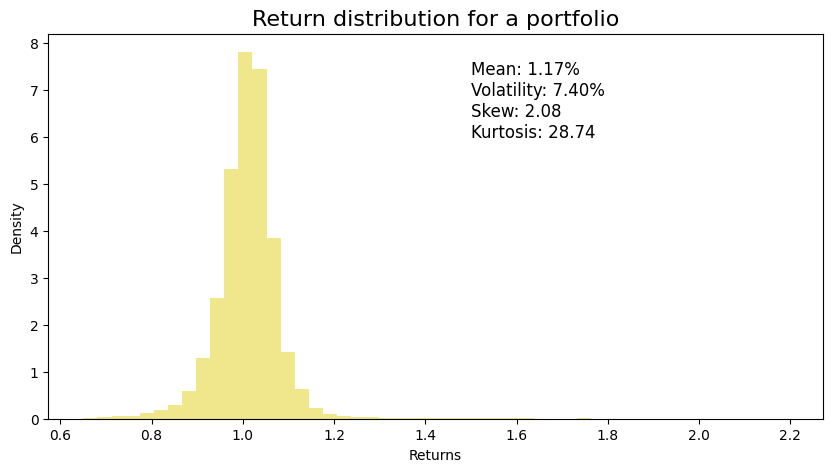

In [201]:
# return distribution for a portfolio (7) 
# return distribution for a single stock (6) ; this is for apple. 
df = pd.read_csv("./WRDS_portfolio_all_10.csv")

# convert returns to a numeric column
df["totret"] = pd.to_numeric(df["totret"], errors="coerce")
df = df.dropna(subset = "totret")
df["gross_returns"] = df["totret"] + 1 #gross returns, also to match the returns chart from the slides

returns = df["gross_returns"]

mean = np.mean(returns) - 1
vol = np.std(returns)
skewness = skew(returns)
kurt = kurtosis(returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=50, color='khaki', density=True)
plt.title("Return distribution for a portfolio", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Density")

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skewness:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)
plt.text(1.5, 6, stats_text, fontsize=12)

plt.show()


### Daily returns on the market portfolio 

Data - used index file on S&P 500 in WRDS (Query 9700722)

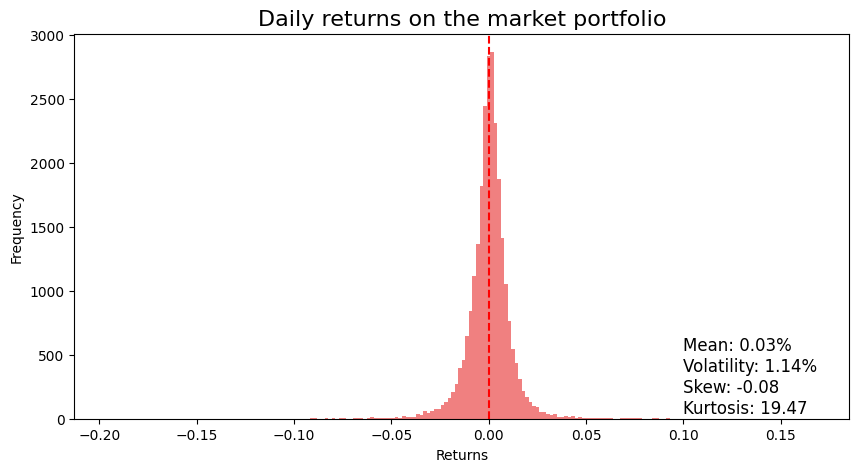

In [134]:
# daily returns on market portfolio (12)

df = pd.read_csv("./WRDS_index_file_SP500.csv")

df["vwretx"] = pd.to_numeric(df["vwretx"], errors = "coerce")
df = df.dropna(subset = "vwretx")
df["returns"] = df["vwretx"]

returns = df["returns"]


mean = np.mean(returns)
vol = np.std(returns)
skw = skew(returns)
kurt = kurtosis(returns, fisher=False)  # use Pearson definition (normal = 3)

plt.figure(figsize=(10, 5))
plt.hist(returns, bins=200, color='lightcoral', density=False)
plt.axvline(x=0, color='red', linestyle='dashed')

stats_text = (
    f"Mean: {mean*100:.2f}%\n"
    f"Volatility: {vol*100:.2f}%\n"
    f"Skew: {skw:.2f}\n"
    f"Kurtosis: {kurt:.2f}"
)

plt.text(0.1, 45, stats_text, fontsize=12)

plt.title("Daily returns on the market portfolio", fontsize=16)
plt.xlabel("Returns")
plt.ylabel("Frequency")

plt.show()


### Sampling Distribution for Kurtosis

Data - used index file on S&P 500 in WRDS (Query 9700722)

Some comments/questions:
* Not sure how the population kurtosis is so high in the slides? Should I be looking for another data source?

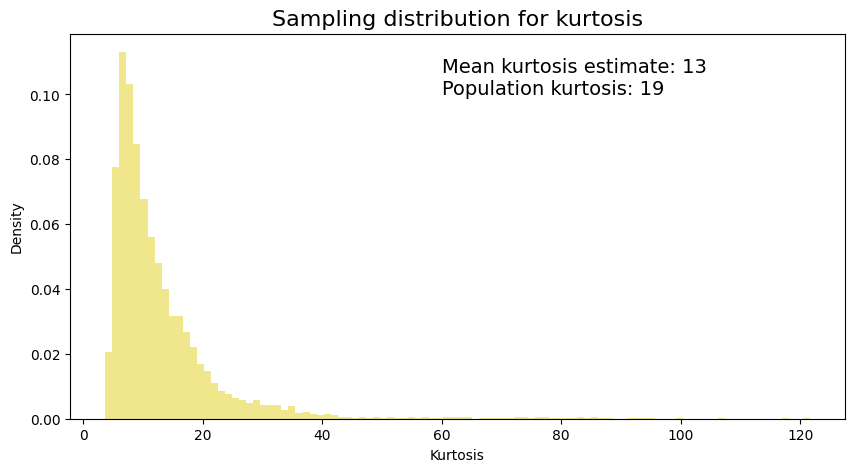

In [131]:
# sampling distribution for kurtosis (13)

df = pd.read_csv("./WRDS_index_file_SP500.csv")

df["vwretx"] = pd.to_numeric(df["vwretx"], errors = "coerce")
df = df.dropna(subset = "vwretx")

returns = df["vwretx"]

# find the kurtosis of the population
pop_kurtosis = kurtosis(returns, fisher = False)

# finding the kurtosis for multiple samples. 
randomly_sample = 250 # each time we sample, lets get 250 numbers at a time (250 days in trading year)
number_of_reps = 10000 # do this 10,000 times

kurtosis_exp  = []

for _ in range(number_of_reps):
    sample = np.random.choice(returns, randomly_sample, replace = True)
    sample_kurtosis = kurtosis(sample, fisher = False)
    kurtosis_exp.append(sample_kurtosis)

plt.figure(figsize=(10, 5))
plt.hist(kurtosis_exp, bins=100, color='khaki', density=True)
plt.xlabel("Kurtosis")
plt.ylabel("Density")
plt.title("Sampling distribution for kurtosis", fontsize=16)

mean_kurt = np.mean(kurtosis_exp)
plt.text(60, 0.1, f"Mean kurtosis estimate: {mean_kurt:.0f}\nPopulation kurtosis: {pop_kurtosis:.0f}", fontsize=14)

plt.show()

### Distribution of Returns to Putwrite Index

Data - for the putwrite index, I downloaded the historical data that the CBOE provided, which was from 2007-2025. 

Some questions:
* I only had ~5000 samples from the CBOE putwrite index daily returns. However, the figure in the slideshow had really high frequencies. Should I be using a higher frequency of data collection? Or should I only use S&P data from 2007-now so that they can be properly compared? 

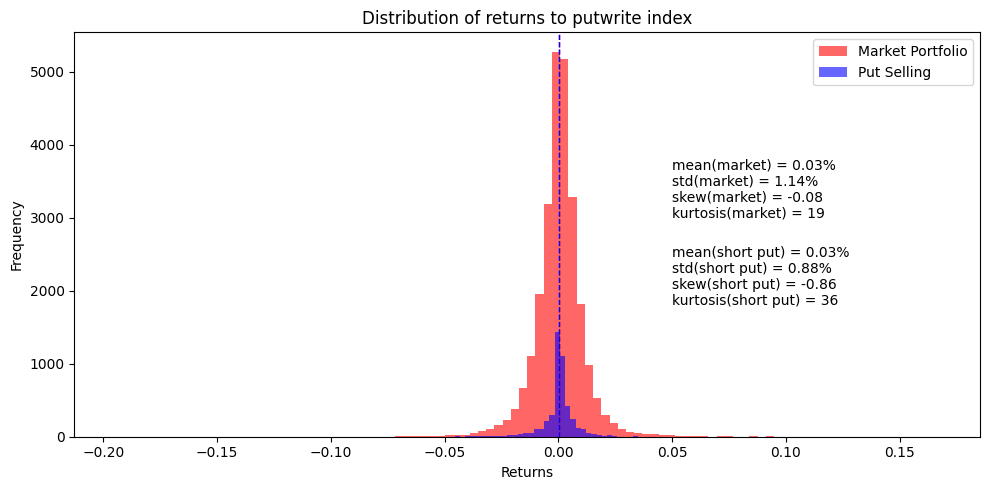

In [162]:
# distribution of returns to putwrite index - compare market portfolio to put selling strategy (22)

# there are two graphs here - one is the market portfolio, which i have the data for
# now, i need to get the data for returns on the short put strat

sp500 = pd.read_csv("./WRDS_index_file_SP500.csv")
strat = pd.read_csv("./CBOE_putwrite_index.csv")

# get the data for both
sp500["vwretx"] = pd.to_numeric(sp500["vwretx"], errors = "coerce")
sp500 = sp500.dropna(subset = "vwretx")
market_returns = sp500["vwretx"]

strat["return"] = pd.to_numeric(strat["return"], errors = "coerce")
strat = strat.dropna(subset = "return")
putwrite_returns = strat["return"]

plt.figure(figsize=(10, 5))
plt.hist(market_returns, bins=100, alpha=0.6, color='red', label="Market Portfolio")
plt.hist(putwrite_returns, bins=100, alpha=0.6, color='blue', label="Put Selling")
plt.axvline(market_returns.mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_returns.mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title("Distribution of returns to putwrite index")
plt.xlabel("Returns")
plt.ylabel("Frequency")
plt.legend()

market_stats = (
    f"mean(market) = {np.mean(market_returns)*100:.2f}%\n"
    f"std(market) = {np.std(market_returns)*100:.2f}%\n"
    f"skew(market) = {skew(market_returns):.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {np.mean(putwrite_returns)*100:.2f}%\n"
    f"std(short put) = {np.std(putwrite_returns)*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.05, 3000, market_stats, fontsize=10)
plt.text(0.05, 1800, put_stats, fontsize=10)

plt.tight_layout()
plt.show()



### Outliers

(same data as last cell)
Questions:
* To only look at the outliers, I excluded returns less than 2 standard deviations from the market mean for both market and PutWrite index returns. Should I have instead used 2 standard deviations from the PutWrite mean for its own bounds?

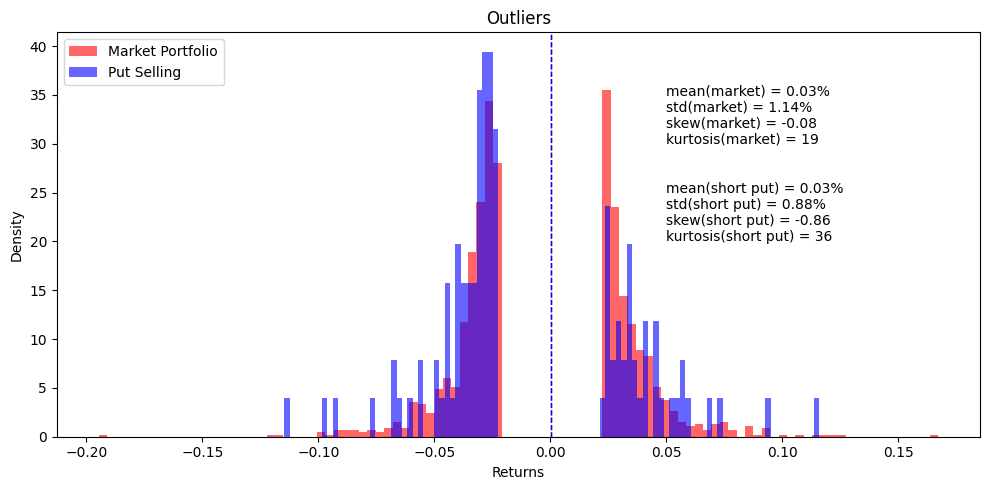

In [170]:
# chart looking just at the outlier of the above graph (23)

# also this graph still has the mean of both datasets. 

# i think i can use +/- 1 or 2 stds and cut otu anythign from mean to 1/2 stds out - then i get the data i want 
sp500 = pd.read_csv("./WRDS_index_file_SP500.csv")
strat = pd.read_csv("./CBOE_putwrite_index.csv")

# get the data for both
sp500["vwretx"] = pd.to_numeric(sp500["vwretx"], errors = "coerce")
sp500 = sp500.dropna(subset = "vwretx")
market_returns = sp500["vwretx"]

strat["return"] = pd.to_numeric(strat["return"], errors = "coerce")
strat = strat.dropna(subset = "return")
putwrite_returns = strat["return"]

## first, lets save the stats for each data set. 
# market
market_mean = np.mean(market_returns)
market_vol = np.std(market_returns)
market_skew = skew(market_returns)
market_kurt = kurtosis(market_returns, fisher = False)
# putwrite 
putwrite_mean = np.mean(putwrite_returns)
putwrite_vol = np.std(putwrite_returns)
putwrite_skew = skew(putwrite_returns)
putwrite_kurt = kurtosis(putwrite_returns, fisher = False)

# find 2 stds out
market_upper_cut = market_mean + 2*market_vol
market_lower_cut = market_mean - 2*market_vol

# putwrite_upper_cut = putwrite_mean + 2*putwrite_vol
# putwrite_lower_cut = putwrite_mean - 2*putwrite_vol

# new returns values
market_cut = []
for element in market_returns:
            if market_lower_cut >= element or element >= market_upper_cut:
                market_cut.append(element)

# putwrite_cut = []
# for element in putwrite_returns:
#             if putwrite_lower_cut >= element or element >= putwrite_upper_cut:
#                 putwrite_cut.append(element)

# i realized that both putwrite and market had the same bounds, so imma use 2 stdevs out from market
putwrite_cut = []
for element in putwrite_returns:
            if market_lower_cut >= element or element >= market_upper_cut:
                putwrite_cut.append(element)

plt.figure(figsize=(10, 5))
plt.hist(market_cut, bins=100, alpha=0.6, color='red', label="Market Portfolio", density=True)
plt.hist(putwrite_cut, bins=100, alpha=0.6, color='blue', label="Put Selling", density=True)
plt.axvline(market_mean, color='red', linestyle='dashed', linewidth=1)
plt.axvline(putwrite_mean, color='blue', linestyle='dashed', linewidth=1)

plt.title("Outliers")
plt.xlabel("Returns")
plt.ylabel("Density")
plt.legend()

market_stats = (
    f"mean(market) = {market_mean*100:.2f}%\n"
    f"std(market) = {market_vol*100:.2f}%\n"
    f"skew(market) = {market_skew:.2f}\n"
    f"kurtosis(market) = {kurtosis(market_returns, fisher=False):.0f}"
)

put_stats = (
    f"mean(short put) = {putwrite_returns.mean()*100:.2f}%\n"
    f"std(short put) = {putwrite_returns.std()*100:.2f}%\n"
    f"skew(short put) = {skew(putwrite_returns):.2f}\n"
    f"kurtosis(short put) = {kurtosis(putwrite_returns, fisher=False):.0f}"
)

plt.text(0.05, 30, market_stats, fontsize=10)
plt.text(0.05, 20, put_stats, fontsize=10)

plt.tight_layout()
plt.show()



### CDX Spreads (!!!)

Some questions:
* Where is the model data from?
* I wasn't sure what RED id super senior tranches would be for CDX spreads. 

In [187]:
# CDX spread - super senior tranche - data vs model on tranche spread (also where do i get the data for the model?) (25)

### Recency in Expectations of Stock Returns

Some comments/questions:
* I wasn't able to find historical data with Gallup, so I am using AAII historical data.
* I'm not exactly sure how to get the fitted values based on past returns.
* Also, I realize this chart is much more volatile than the one in the slideshow. I think data is collected weekly, but should I do a different sampling frequency?

/var/folders/1q/zjhbsb817hqgmgmz4y0jrh0r0000gn/T/ipykernel_89537/2957905467.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  times = pd.to_datetime(sentiment["date"], errors="coerce")


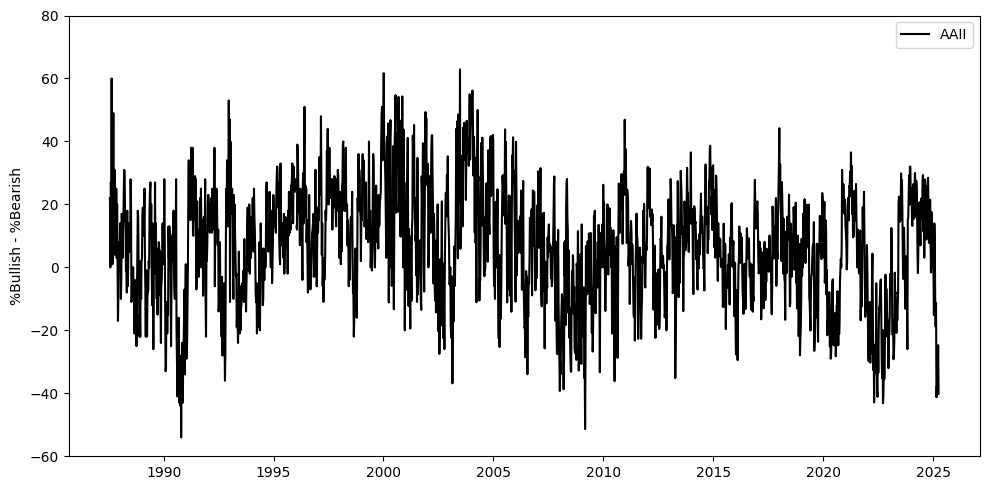

In [186]:
# recency in expectations of stock returns - looking at gallup and a fitted value based on past returns (31)

sentiment = pd.read_csv("./AAII_sentiment.csv")

times = pd.to_datetime(sentiment["date"], errors="coerce")
spread = pd.to_numeric(sentiment["spread"], errors="coerce") * 100


plt.figure(figsize=(10, 5))
plt.plot(times, spread, label="AAII", color="black")

plt.xlabel("")
plt.ylabel("%Bullish - %Bearish")
plt.legend()
plt.ylim(-60, 80)
plt.tight_layout()
plt.show()
